Student: Jorge Alberto Muñozcano Castro 

SQL-Alchemy-Challenge

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [2]:
import numpy as np
import pandas as pd
import scipy.stats

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#Create an engine with the sqlite resource and add a conn in order to transform into a pd.read df
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn =engine.connect
#test succesfull engine link with sqlite succesfull

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
#test succesfull engine created succesfull

In [7]:
# We can view all of the classes that automap found
Base.classes.keys() #test succesfull base key generated

['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [10]:
# Use inspector,connect it to the engine and give a name to the new table
inspector = inspect(engine)
inspector.get_table_names() #test succesfull ll index values generated

['measurement', 'station']

In [237]:
# get the columns index to work the next part
for column in columns:
    print(column['name'], column["type"]) #test succesfull ll data generated

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
Olddate = (session.query(Measurements.date).\
              order_by(Measurements.date).first())
Recentdate = (session.query(Measurements.date).\
              order_by(Measurements.date.desc()).first())
print(f"the most Oldest Precipitation Data Date was in {Olddate}")
print(f"the most Recent Precipitation Data Date was in {Recentdate}") #test succesfull date generated

the most Oldest Precipitation Data Date was in ('2010-01-01',)
the most Recent Precipitation Data Date was in ('2017-08-23',)


In [18]:
# Perform a query to retrieve the data and precipitation scores
Precip_score = session.query(func.strftime("%Y-%m-%d", Measurements.date), Measurements.prcp).\
        filter(func.strftime("%Y-%m-%d", Measurements.date) >= dt.date(2010, 1, 1)).all()
Precip_score #test succesfull query generated

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
weather_df = pd.DataFrame(Precip_score, columns = ['date', 'precipitation'])
weather_df.set_index('date', inplace = True)
weather_df.head() #test succesfull dataframe generated

,precipitation
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN


In [51]:
# Sort the dataframe by date
weather20162017 = weather_df.sort_values(by='date',ascending= False) 
weather20162017.head() #test succesfull dataframe organized

,precipitation
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00


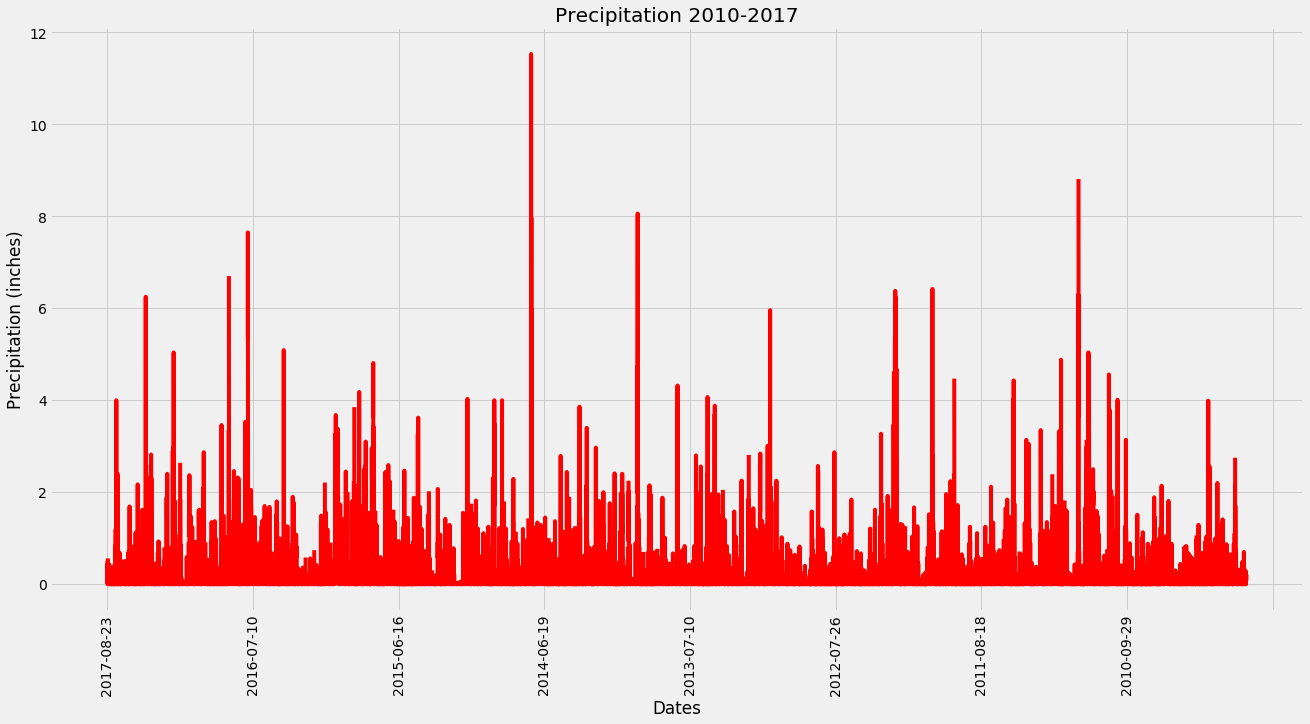

In [52]:
# Use Pandas Plotting with Matplotlib to plot the data
# 5 Plot the Results in a Matplotlib bar chart
fig, ax = plt.subplots(figsize = (20, 10))
weather20162017.plot(ax = ax, x_compat = True, legend=False,rot=90, color = "red")
plt.title("Precipitation 2010-2017")
plt.xlabel("Dates")
plt.ylabel("Precipitation (inches)")
plt.savefig("Images/1)Precipitation_2010_2017_plot.png") #test succesfull chart save on Images
plt.show()#test succesfull chart generated

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
weather20162017.describe() #test succesfull datafrane generated

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [23]:
# Design a query to show how many stations are available in this dataset?
stations_available = session.query(Stations.id).count()
stations_available #test succesfull query generated

9

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = (session.query(Measurements.station, func.count(Measurements.station)).\
                        group_by(Measurements.station).\
                        order_by(func.count(Measurements.station).desc()).all())
active_stations #test succesfull query generated

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
most_active_station = 'USC00519281'
highest_station = session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
    filter(Measurements.station == most_active_station).all()
# highest temperature recorded, and average temperature of the most active station?
print (f"The most active station is {most_active_station} with the following temperatures {highest_station}")
#test succesfull result printed

The most active station is USC00519281 with the following temperatures [(54.0, 85.0, 71.66378066378067)]


In [26]:
# Choose the station with the highest number of temperature observations.
highest_temp_observation = session.query(Measurements.date, Measurements.tobs).\
filter(Measurements.station == most_active_station).\
filter(func.strftime("%Y-%m-%d", Measurements.date) >= dt.date(2016, 8, 23)).all()
#save as a data frame
highestobservation_df = pd.DataFrame(highest_temp_observation, columns = ['date', 'temperature'])
highestobservation_df.head()
#test succesfull chart generated

,date,temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


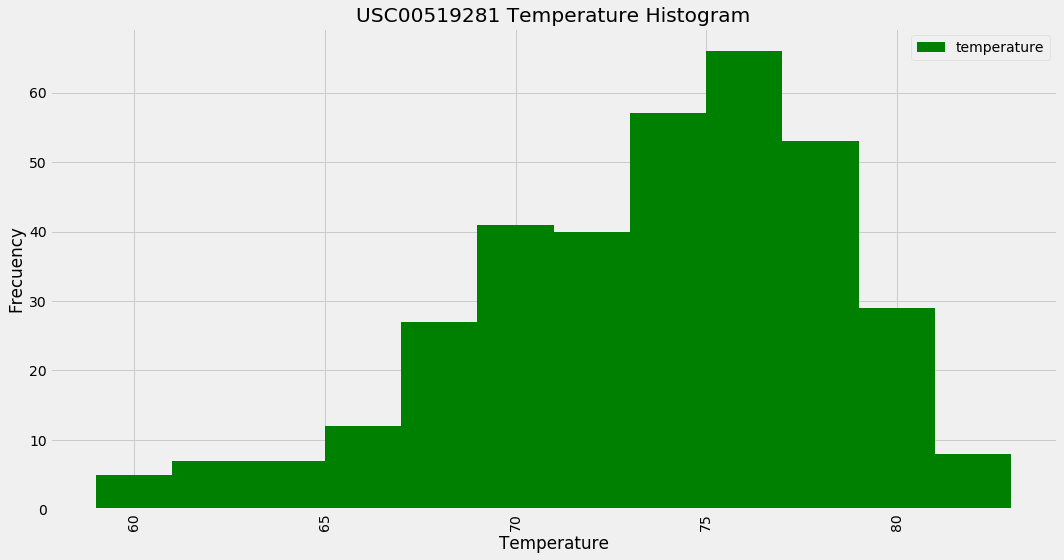

In [48]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
fig, ax = plt.subplots(figsize = (15, 8))
highestobservation_df.plot.hist(bins = 12, ax = ax, color="green",rot=90)
plt.title("USC00519281 Temperature Histogram")
plt.xlabel("Temperature")
plt.ylabel("Frecuency")
plt.tight_layout()
plt.savefig("Images/2)USC00519281_Temperature_Histogram_plot.png") #test succesfull chart save on Images
plt.show() # test succesfull chart generated

## Bonus Challenge Assignment

Temperature Analysis I

In [28]:
# Create 2 query where you can search data from june and december for all the years included in the data origin
june_temp_data = session.query(Measurements.date, Measurements.tobs).filter(func.strftime("%m",Measurements.date) == '06').all()
dec_temp_data = session.query(Measurements.date, Measurements.tobs).filter(func.strftime("%m",Measurements.date) == '12').all()

In [29]:
# convert raw data to DataFrames to label them and then concatenate into one DataFrame
june_temp = pd.DataFrame(june_temp_data,columns=["Date","Temperature"])
dec_temp = pd.DataFrame(dec_temp_data,columns=["Date","Temperature"])
june_temp["Month"] = "June"
dec_temp["Month"] = "December"
hawaii_temp = pd.concat([june_temp,dec_temp], ignore_index=True)

In [30]:
# get the average for both Months
avg_hawaii_temp = hawaii_temp.groupby("Month").mean()
avg_hawaii_temp.head() #test succesfull dataframe created

,Temperature
Month,
December,71.041529
June,74.944118


In [31]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant
ttest = list(scipy.stats.ttest_ind(june_temp["Temperature"], dec_temp["Temperature"]))
print(f" The ttest results were {ttest}") #test succesfull ttest succesfully generated
print(f" We can observe that the pvalue is less than 0.05,")
print(f" which means that the difference in means is statistically significant and that there is a meaningful difference in temperature between June and December.")

 The ttest results were [31.60372399000329, 3.9025129038616655e-191]
 We can observe that the pvalue is less than 0.05,
 which means that the difference in means is statistically significant and that there is a meaningful difference in temperature between June and December.


Temperature Analysis II

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.  
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
    Returns:
        TMIN, TAVE, and TMAX
    """
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [44]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trips_data = calc_temps('2017-01-01','2018-01-01')
print(f"From 2017-01-01 to 2018-01-0 the calculated temperature was the following: {trips_data}")
#test succesfull results printed

From 2017-01-01 to 2018-01-0 the calculated temperature was the following: [(58.0, 74.14387974230493, 87.0)]


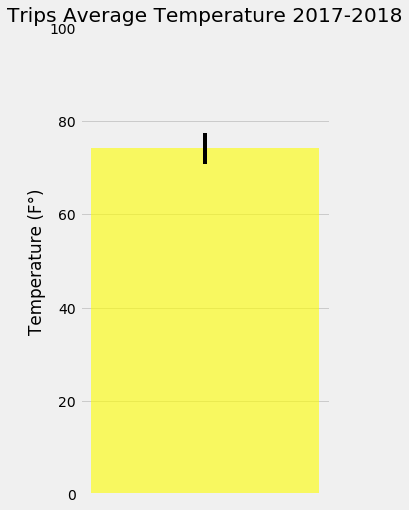

In [49]:
# Plot the results from your previous query as a bar chart. 
# Stablish the minimum and Maximum temperature from trips_data
minimum_temp = trips_data[0][0]
average_temp = trips_data[0][1]
maximum_temp = trips_data[0][2]
# Get the minimum and maximum error
minimum_temp_err = average_temp - minimum_temp
maximum_temp_err = maximum_temp - average_temp
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(4,8))
plt.bar(0, average_temp, yerr=[maximum_temp_err-minimum_temp_err], color = "yellow",alpha=.6)
plt.title("Trips Average Temperature 2017-2018")
plt.ylim(0,100)
plt.ylabel('Temperature (F°)')
plt.xticks([])
plt.savefig("Images/3)Trips_average_temperature_plot.png") #test succesfull chart save on Images
plt.show() #test succesfull chart generated

In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2017-01-01'
end_date = '2018-01-01'
rainfall_weather = session.query(Stations.station,func.sum(Measurements.prcp),Stations.name,Stations.elevation, Stations.latitude,Stations.longitude)\
.filter(Measurements.station == Stations.station).filter(Measurements.date >= start_date).filter(Measurements.date <= end_date)\
.group_by(Stations.station).order_by(func.sum(Measurements.prcp).desc())
for weather in rainfall_weather :
    rain="{0:.2f}".format(weather[1])
    print (f"Station Name:  {weather[0]}\  Location:  {weather[2]}\n    Elevation:  {weather[3]}  \
    Latitude:  {weather[4]}  Longitude:  {weather[5]}")
    print()

Station Name:  USC00516128\  Location:  MANOA LYON ARBO 785.2, HI US
    Elevation:  152.4      Latitude:  21.3331  Longitude:  -157.8025

Station Name:  USC00519281\  Location:  WAIHEE 837.5, HI US
    Elevation:  32.9      Latitude:  21.45167  Longitude:  -157.84888999999998

Station Name:  USC00513117\  Location:  KANEOHE 838.1, HI US
    Elevation:  14.6      Latitude:  21.4234  Longitude:  -157.8015

Station Name:  USC00519523\  Location:  WAIMANALO EXPERIMENTAL FARM, HI US
    Elevation:  19.5      Latitude:  21.33556  Longitude:  -157.71139

Station Name:  USC00514830\  Location:  KUALOA RANCH HEADQUARTERS 886.9, HI US
    Elevation:  7.0      Latitude:  21.5213  Longitude:  -157.8374

Station Name:  USC00519397\  Location:  WAIKIKI 717.2, HI US
    Elevation:  3.0      Latitude:  21.2716  Longitude:  -157.8168

Station Name:  USC00517948\  Location:  PEARL CITY, HI US
    Elevation:  11.9      Latitude:  21.3934  Longitude:  -157.9751



In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
def daily_normals(date):
    """Daily Normals.   
    Args:
        date (str): A date string in the format '%m-%d'
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    """
    sel = [func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurements.date) == date).all()
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
first_date = '2018-01-01'
last_date = '2018-01-07'
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
first_date_st = dt.datetime.strptime(first_date, '%Y-%m-%d')
last_date_st = dt.datetime.strptime(last_date, '%Y-%m-%d')

In [38]:
# Loop through the list of %m-%d strings and calculate the normals for each date
monthly_trips = []
normal_trips =[]
while (first_date_st <= last_date_st):
    monthly_trips.append(dt.datetime.strftime(first_date_st,'%Y-%m-%d'))
    date_string = dt.datetime.strftime(first_date_st,'%m-%d')
    normal_trips.append(list(np.ravel(daily_normals(date_string))))
    first_date_st = first_date_st + dt.timedelta(days = 1)
print(f"Monthly Normal total Trips:{normal_trips}") #test succesfull data dates generated

Monthly Normal total Trips:[[62.0, 69.15384615384616, 77.0], [60.0, 69.39622641509433, 77.0], [62.0, 68.9090909090909, 77.0], [58.0, 70.0, 76.0], [56.0, 67.96428571428571, 76.0], [61.0, 68.96491228070175, 76.0], [57.0, 68.54385964912281, 76.0]]


In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
currents_trips = pd.DataFrame(normal_trips, columns=['tmin','tavg','tmax'])
currents_trips['Date'] = monthly_trips
currents_trips = currents_trips.set_index("Date")
currents_trips.head() #test succesfull data frame generated

,tmin,tavg,tmax
Date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


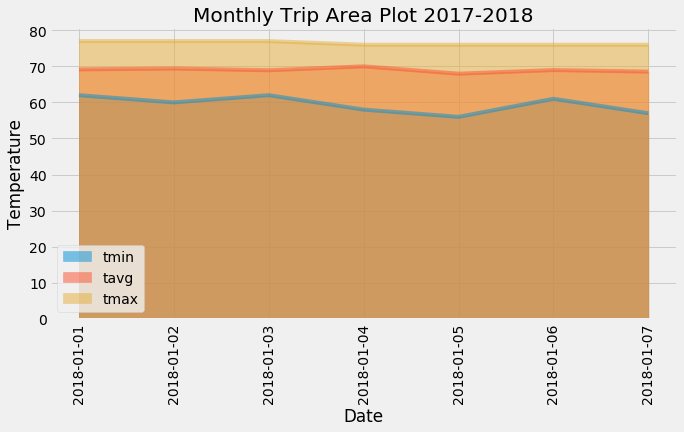

In [50]:
# Plot the daily normals as an area plot with `stacked=False`
currents_trips.plot.area(stacked=False, figsize=(10,5),rot=90)
plt.title("Monthly Trip Area Plot 2017-2018")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.savefig("Images/4)Monthly_trips_area_plot.png") #test succesfull chart save on Images
plt.show() #test succesfull chart generated